# ***Matlab Vs Python***
## **Q1： 求解大型稀疏矩阵 A\*X = B**
稀疏矩阵是指矩阵中大多数元素为零元素。而大型稀疏矩阵，则是指矩阵的阶数很大的稀疏矩阵。大型稀疏矩阵线性化方程组的数值求解问题广泛存在于计算机数值模拟领域。下面将对比MATLAB 和 Python大型稀疏线性方程组计算效率。其中TestData/scipy_solve.mat为测试数据，其中包括L,R和已经得到的S。以下是对求解大型稀疏矩阵进行求解。**结果如下：**
* MATLAB 
> X= A\B or S=L\R; % **用时大约 0.2990 s**
* Python 
> from scipy.sparse.linalg import spsolve<br> S = spsolve(L, R) # **用时大约 0.468 s**<br>
from numpy.linalg import solve / from scipy.linalg import solve<br> S_py_NP = solve(L_dense, R) # **用时大约 2 min**<br>

**结果发现：<br>**
**matlab使用A\B方法，python使用spsolve和solve方法，并对结果进行对比发现：<br>**
--> **1.求解大型稀疏矩阵的时候scipy中spsolve方法更好(~0.468 s),但是MATLAB更加高效(~0.2990 s)。<br>**
--> **2.Matlab与Python的对矩阵相除的结果有微小的差异,可以忽略。**

In [1]:
# 读取测试数据
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataFile = 'TestData/scipy_solve.mat'
data = loadmat(dataFile)
L = data['L'];R = data['R'];S_mat = data['S']
L_dense = L.todense()

In [2]:
# python计算并对出运行时间
from scipy.sparse.linalg import spsolve
%time S_py = spsolve(L, R)

CPU times: user 430 ms, sys: 28 ms, total: 458 ms
Wall time: 458 ms


In [3]:
from numpy.linalg import solve
%time S_py_NP = solve(L_dense, R)

CPU times: user 7min 3s, sys: 7.05 s, total: 7min 10s
Wall time: 1min 48s


In [4]:
from scipy.linalg import solve
%time S_py_3 = solve(L_dense, R)

CPU times: user 7min 19s, sys: 2.21 s, total: 7min 21s
Wall time: 1min 53s


S_mat (36000, 1) S_py (36000,) S_dis (36000,)
S_dis max: 2.1467203015212988e-14 
S_dis min: -4.3557723600266786e-14


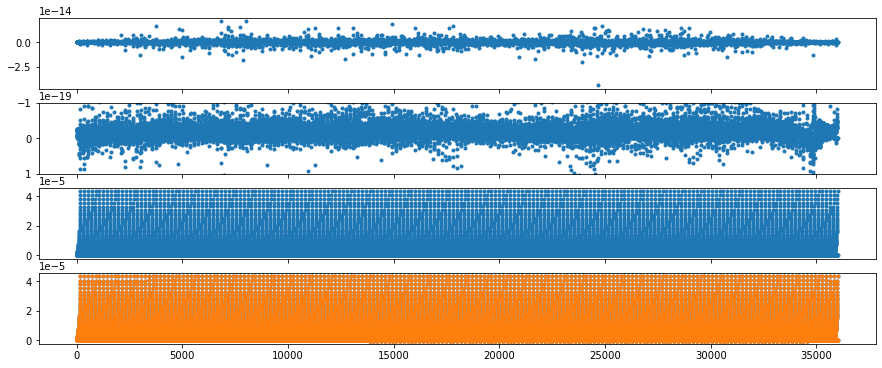

In [7]:
# 对比matlab 与 python结果的差异
S_dis = S_mat[:,0] - S_py
print('S_mat',S_mat.shape,'S_py',S_py.shape,'S_dis',S_dis.shape)
print('S_dis max:',max(S_dis),'\nS_dis min:',min(S_dis))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=[15,6])
ax1.plot(S_dis,'.')
ax2.plot(S_dis,'.');ax2.set_ylim(0.1e-18, -0.1e-18)
ax3.plot(S_mat,'.')
ax4.plot(S_py,'.')
ax4.plot(S_mat,'.')